In [3]:
# Import statements
import pandas as pd
import textblob
from textblob import Word, TextBlob
import nltk
from nltk.corpus import stopwords
import re # regular expression
import os
from wordcloud import WordCloud # to represnet words in image format
import matplotlib.pyplot as plt
from collections import Counter  # frequency calculations
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer # noramlization of a data like a min max scalar
from sklearn.naive_bayes import  GaussianNB, MultinomialNB

In [4]:
os.getcwd()

'C:\\Users\\Koti\\Documents\\Data_Science\\DS_May_2020\\codes'

In [6]:
path=r"C:\Users\Koti\Desktop"
os.chdir(path)
os.getcwd()

'C:\\Users\\Koti\\Desktop'

In [7]:
Originaldata=pd.read_excel("Glassdoor reviews.xlsx",header=0,na_values=["NaN"])

In [8]:
Originaldata.shape

(1365, 2)

In [9]:
Originaldata.head() # return first 5 records of the data

,Pros,Cons
0,"A very good company, working environment is ve...",Paywise iit is very less
1,Good working environment in Bangalore,compensation is not that great
2,it has good work environment,they do not have good opportunities any more i...
3,Company is good to work .\r\r\nWork life bala...,Very less hike now a days .\r\r\nAnnual variab...
4,"Equality among the colleagues ,Stress free env...",I would say I don't find any cons in accent


# step1: is there any missing at row level
# step2: is there any missing value in pros but not cons
# step3: is there any missing values in cons but not pros

In [11]:
# Check if data null values in all the columns
Originaldata.loc[Originaldata["Cons"].isnull() & Originaldata["Pros"].isnull()]

,Pros,Cons
731,NaN,NaN


In [12]:
OriginalData1=Originaldata.drop([731],axis=0)

In [13]:

Originaldata = Originaldata.drop(Originaldata[(Originaldata.Cons.isnull() & Originaldata.Pros.isnull())].index)

In [14]:
OriginalData1.shape

(1364, 2)

In [15]:
OriginalData1.loc[OriginalData1.Cons.isnull() & OriginalData1.Pros.isnull()]

,Pros,Cons


In [16]:
OriginalData1.loc[OriginalData1.Cons.isnull()]

,Pros,Cons
169,- Good work life balance\r\r\n- Open door pol...,NaN
408,-Onsite opportunities are good if you are in E...,NaN
552,-Highly caring about peoples and cultures\r\r\...,NaN
653,- Good Work Environment\r\r\n- Work Life Balan...,NaN
671,- Good work environment\r\r\n- Good policies\r...,NaN
787,"- If you are in right team, you get to work on...",NaN
807,- Flexible work culture\r\r\n- Plenty of oppor...,NaN
1187,-- You will get a lot of exposure to work on t...,NaN


In [17]:
OriginalData1.loc[OriginalData1.Cons.isnull()]="No cons"

In [18]:
OriginalData1.loc[OriginalData1.Cons.isnull()]

,Pros,Cons


In [19]:
# check the missing values in pros
OriginalData1.loc[OriginalData1["Pros"].isnull()]

,Pros,Cons


In [20]:
OriginalData1.loc[OriginalData1.Cons.isnull() & OriginalData1.Pros.isnull()]

,Pros,Cons


In [21]:
# Divide the data into pros and cons
prosdf = pd.DataFrame(OriginalData1["Pros"])
consdf = pd.DataFrame(OriginalData1["Cons"])

In [22]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\r\r\nWork life bala...
4,"Equality among the colleagues ,Stress free env..."


In [23]:
consdf.head()

,Cons
0,Paywise iit is very less
1,compensation is not that great
2,they do not have good opportunities any more i...
3,Very less hike now a days .\r\r\nAnnual variab...
4,I would say I don't find any cons in accent


In [30]:
# Write some functions

import string
abc=string.punctuation

# Function to clean data
def clean_review(text):
    '''
    This fucntion is to clean the data
    '''
    letters_only = re.sub("[^a-zA-Z]"," ", text) # Remove all digits and punctuation
    words = letters_only.lower().split() # Convert it into lower case and then stroing in word format
    clean_words = [w for w in words if len(w) > 1] # Remove 1/2 letter words
    return(" ".join(clean_words))

# Function to identify stop words
def stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to plot word cloud
def plot_word_cloud(text):
    wordcloud = WordCloud().generate(text) # Plot wordcloud using WordCloud function
    
    #%matplotlib inline # plot the graph in the same window
    
    fig = plt.figure(figsize = (8,6)) # set the figure margins
    plot = plt.imshow(wordcloud) # show the plot
    return plot

# Function to return stopwords
def stopwordcount(plist):
    return sum(plist, [])


In [31]:
clean_review("Compensation123,. is 999 ???$not that great!!!\r\r")

'compensation is not that great'

In [32]:
stop_words('compensation is not that great')

['that', 'not', 'is']

In [33]:
prosdf.head()

,Pros
0,"A very good company, working environment is ve..."
1,Good working environment in Bangalore
2,it has good work environment
3,Company is good to work .\r\r\nWork life bala...
4,"Equality among the colleagues ,Stress free env..."


In [34]:
prosdf["precleaned"]=prosdf["Pros"].apply(lambda x:stop_words(x))

In [35]:
prosdf.head()

,Pros,precleaned
0,"A very good company, working environment is ve...","[a, and, to, as, very, other, is]"
1,Good working environment in Bangalore,[in]
2,it has good work environment,"[has, it]"
3,Company is good to work .\r\r\nWork life bala...,"[to, is]"
4,"Equality among the colleagues ,Stress free env...",[the]


In [36]:
prosdf["cleaned_review"]=prosdf["Pros"].apply(lambda x:clean_review(x))

In [37]:
prosdf.head()

,Pros,precleaned,cleaned_review
0,"A very good company, working environment is ve...","[a, and, to, as, very, other, is]",very good company working environment is very ...
1,Good working environment in Bangalore,[in],good working environment in bangalore
2,it has good work environment,"[has, it]",it has good work environment
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company is good to work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...


In [38]:
prosdf["postcleaned"]=prosdf["cleaned_review"].apply(lambda x:stop_words(x))

In [39]:
prosdf.head()

,Pros,precleaned,cleaned_review,postcleaned
0,"A very good company, working environment is ve...","[a, and, to, as, very, other, is]",very good company working environment is very ...,"[and, to, as, very, other, is]"
1,Good working environment in Bangalore,[in],good working environment in bangalore,[in]
2,it has good work environment,"[has, it]",it has good work environment,"[has, it]"
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company is good to work work life balance,"[to, is]"
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the]


In [40]:
# Extract stop words from prosdf data
stopWords = stopwordcount(prosdf['postcleaned'])
stopWords[0:10]

['and', 'to', 'as', 'very', 'other', 'is', 'in', 'has', 'it', 'to']

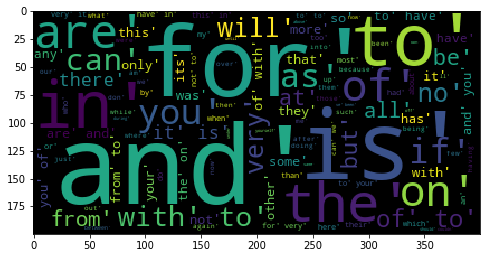

In [41]:
plot_word_cloud(str(stopWords))

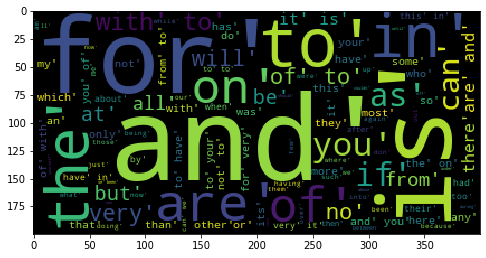

In [42]:
wordcloud = WordCloud().generate(str(stopWords)) # Plot wordcloud using WordCloud function
    
#%matplotlib inline # plot the graph in the same window
    
fig = plt.figure(figsize = (8,6)) # set the figure margins
plot = plt.imshow(wordcloud) # show the plot

In [43]:
print(Counter(stopWords))

Counter({'to': 489, 'and': 399, 'is': 277, 'for': 261, 'of': 247, 'in': 213, 'the': 193, 'you': 177, 'are': 175, 'on': 139, 'with': 139, 'very': 106, 'it': 100, 'if': 91, 'as': 88, 'can': 85, 'from': 73, 'have': 73, 'no': 65, 'will': 64, 'your': 62, 'be': 51, 'not': 51, 'at': 49, 'but': 49, 'all': 46, 'this': 42, 'there': 42, 'more': 39, 'some': 38, 'other': 37, 'they': 37, 'only': 34, 'has': 31, 'its': 31, 'that': 31, 'was': 30, 'so': 29, 'any': 27, 'here': 24, 'which': 23, 'my': 22, 'an': 21, 'who': 21, 'than': 21, 'or': 20, 'most': 19, 'do': 19, 'we': 17, 'about': 17, 'their': 16, 'had': 16, 'when': 15, 'too': 14, 'by': 14, 'been': 13, 'then': 12, 'after': 12, 'me': 12, 'don': 10, 'out': 10, 'just': 10, 'while': 9, 'few': 9, 'were': 9, 'where': 9, 'up': 8, 'because': 8, 'such': 8, 'having': 7, 'what': 7, 'our': 7, 'now': 7, 'am': 7, 'over': 6, 'being': 6, 'again': 6, 'them': 6, 'into': 6, 'doing': 5, 'those': 5, 'how': 4, 'between': 4, 'll': 4, 'yourself': 3, 'above': 3, 'during': 3

In [44]:
len(Counter(stopWords))

115

In [45]:
# Function to identify  no stop words
def no_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(list(set(stop_words)))

# Function to identify  no stop words
def clean_stop_words(review):
    words = review.lower().split() # split sentence into words
    stops = set(stopwords.words("english")) # import stop words from nltk
    stop_words = [w for w in words if w not in stops] # identify stop words from the sentence
    return(" ".join(stop_words))


In [46]:
prosdf['stop_removed'] = prosdf['cleaned_review'].apply(lambda x: no_stop_words(x))

In [47]:
prosdf.head()

,Pros,precleaned,cleaned_review,postcleaned,stop_removed
0,"A very good company, working environment is ve...","[a, and, to, as, very, other, is]",very good company working environment is very ...,"[and, to, as, very, other, is]","[company, less, companies, great, technology, ..."
1,Good working environment in Bangalore,[in],good working environment in bangalore,[in],"[working, environment, bangalore, good]"
2,it has good work environment,"[has, it]",it has good work environment,"[has, it]","[environment, work, good]"
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company is good to work work life balance,"[to, is]","[company, work, good, life, balance]"
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[equality, colleagues, environment, stress, am..."


In [48]:
prosdf['clean_text'] = prosdf['cleaned_review'].apply(lambda x: clean_stop_words(x))

In [49]:
prosdf.head()

,Pros,precleaned,cleaned_review,postcleaned,stop_removed,clean_text
0,"A very good company, working environment is ve...","[a, and, to, as, very, other, is]",very good company working environment is very ...,"[and, to, as, very, other, is]","[company, less, companies, great, technology, ...",good company working environment good friendly...
1,Good working environment in Bangalore,[in],good working environment in bangalore,[in],"[working, environment, bangalore, good]",good working environment bangalore
2,it has good work environment,"[has, it]",it has good work environment,"[has, it]","[environment, work, good]",good work environment
3,Company is good to work .\r\r\nWork life bala...,"[to, is]",company is good to work work life balance,"[to, is]","[company, work, good, life, balance]",company good work work life balance
4,"Equality among the colleagues ,Stress free env...",[the],equality among the colleagues stress free envi...,[the],"[equality, colleagues, environment, stress, am...",equality among colleagues stress free environment


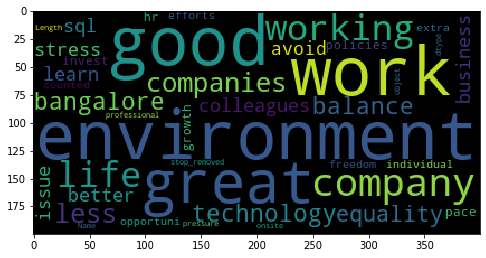

In [50]:
plot_word_cloud(str(prosdf["stop_removed"]))

In [52]:
non_stopWords=stopwordcount(prosdf['stop_removed'])

In [54]:
print(Counter(non_stopWords))

Counter({'good': 829, 'work': 658, 'life': 236, 'environment': 227, 'company': 223, 'balance': 215, 'culture': 190, 'opportunities': 124, 'projects': 114, 'place': 112, 'great': 107, 'working': 104, 'project': 104, 'learning': 98, 'learn': 95, 'nice': 91, 'friendly': 85, 'people': 81, 'get': 81, 'accent': 80, 'management': 74, 'flexible': 72, 'training': 65, 'team': 64, 'lot': 59, 'new': 57, 'time': 57, 'employee': 57, 'growth': 53, 'freshers': 53, 'salary': 49, 'career': 49, 'best': 49, 'opportunity': 47, 'employees': 45, 'lots': 44, 'job': 43, 'depends': 42, 'onsite': 42, 'technologies': 41, 'less': 37, 'like': 37, 'fresher': 36, 'better': 35, 'exposure': 35, 'one': 35, 'brand': 35, 'nothing': 34, 'experience': 34, 'start': 34, 'home': 34, 'policies': 34, 'pressure': 33, 'managers': 33, 'many': 33, 'infrastructure': 33, 'name': 32, 'supportive': 32, 'technology': 31, 'flexibility': 31, 'excellent': 31, 'client': 31, 'pay': 31, 'well': 31, 'years': 31, 'pros': 30, 'much': 28, 'things'

In [55]:
len(Counter(non_stopWords))

1953

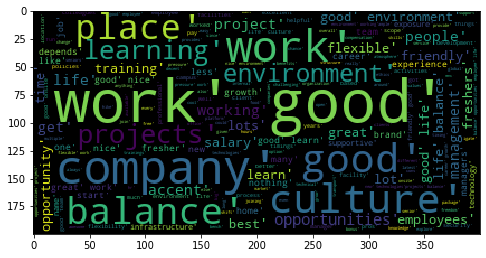

In [56]:
plot_word_cloud(str(non_stopWords))